from google.colab import files
uploaded = files.upload()
print(data.head())


資料來源: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [ ]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


print(data.head())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer               6   
1          2   Male   28                Doctor               6   
2          3   Male   28                Doctor               6   
3          4   Male   28  Sales Representative               4   
4          5   Male   28  Sales Representative               4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200            NaN  
1          75        10000            NaN  
2          75        10000            

In [ ]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', usecols=lambda column: column not in ['Occupation', 'BMI Category', 'Sleep Duration', 'Blood Pressure', 'Person ID'])
print(data.head())


  Gender  Age  Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0   Male   27                       42             6          77         4200   
1   Male   28                       60             8          75        10000   
2   Male   28                       60             8          75        10000   
3   Male   28                       30             8          85         3000   
4   Male   28                       30             8          85         3000   

  Sleep Disorder  
0            NaN  
1            NaN  
2            NaN  
3    Sleep Apnea  
4    Sleep Apnea  


In [ ]:
from sklearn.model_selection import train_test_split

# 划分特征和目标变量
X = data.drop(columns=['Sleep Disorder'])  # 特征
y = data['Sleep Disorder']  # 目标变量

# 将目标变量转换为数值（如果需要）
# 这里Sleep Disorder列可能已经是数值，如果不是，您可能需要进行编码

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 显示划分后的训练集和测试集大小
print("训练集大小：", X_train.shape)
print("测试集大小：", X_test.shape)


训练集大小： (299, 6)
测试集大小： (75, 6)


In [ ]:
print(y_train.dtype)


object


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 创建LabelEncoder对象
label_encoder = LabelEncoder()

# 对特征列进行标签编码
data['Gender'] = label_encoder.fit_transform(data['Gender'])

X = data.drop(columns=['Sleep Disorder'])  # 特征
y = data['Sleep Disorder']  # 目标变量

# 将目标变量转换为数值（如果需要）
# 这里Sleep Disorder列可能已经是数值，如果不是，您可能需要进行编码

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# 显示转换后的数据集的前几行
print(X_train.head())

# 检查数据类型
print(X_train.dtypes)


     Gender  Age  Physical Activity Level  Stress Level  Heart Rate  \
192       1   43                       45             7          72   
75        1   33                       30             8          72   
84        1   35                       60             5          70   
362       0   59                       75             3          68   
16        0   29                       40             7          80   

     Daily Steps  
192         6000  
75          5000  
84          8000  
362         7000  
16          4000  
Gender                     int64
Age                        int64
Physical Activity Level    int64
Stress Level               int64
Heart Rate                 int64
Daily Steps                int64
dtype: object


In [ ]:
print(X_train.dtypes)


Gender                     int64
Age                        int64
Physical Activity Level    int64
Stress Level               int64
Heart Rate                 int64
Daily Steps                int64
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler

# 创建 StandardScaler 对象
scaler = StandardScaler()

# 对训练集进行特征缩放
X_train_scaled = scaler.fit_transform(X_train)

# 对测试集进行特征缩放
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_train_scaled.dtype)
print(y_train.dtype)


float64
object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 创建LabelEncoder对象
label_encoder = LabelEncoder()

# 对目标变量进行标签编码
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("测试集准确率：", accuracy)

print(classification_report(y_test, y_pred))


测试集准确率： 0.88
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.85      0.69      0.76        16
           2       0.93      0.98      0.95        43

    accuracy                           0.88        75
   macro avg       0.85      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 加载模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# 如果你已经训练好了模型并保存在文件中，可以使用下面的方式加载模型
# rf_model = joblib.load('your_model_file.pkl')


In [ ]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_new = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_new)
print("测试集准确率：", accuracy)


测试集准确率： 0.88


In [ ]:
#from google.colab import drive

# 將Google Drive掛載到Colab上
#drive.mount('/content/drive')

# 在Google Drive中創建一個名為"predictions.csv"的文件
#np.savetxt('/content/drive/My Drive/predictions.csv', y_pred_new, delimiter=',')


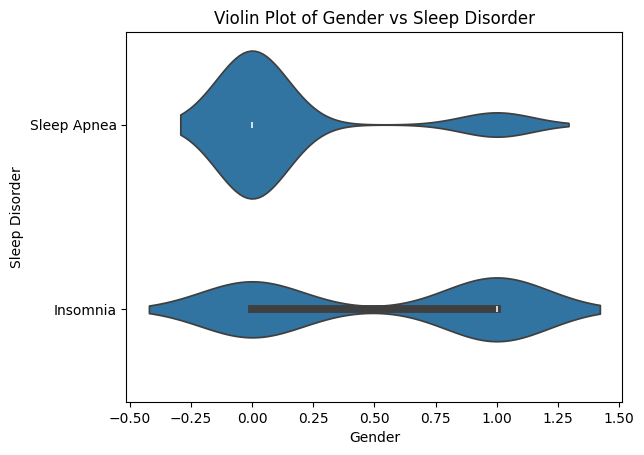

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.violinplot(x='Gender', y='Sleep Disorder', data=data)
plt.title('Violin Plot of Gender vs Sleep Disorder')
plt.show()


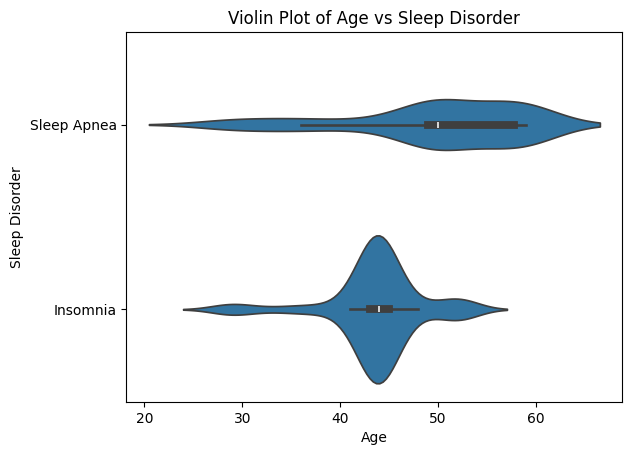

In [ ]:
sns.violinplot(x='Age', y='Sleep Disorder', data=data)
plt.title('Violin Plot of Age vs Sleep Disorder')
plt.show()


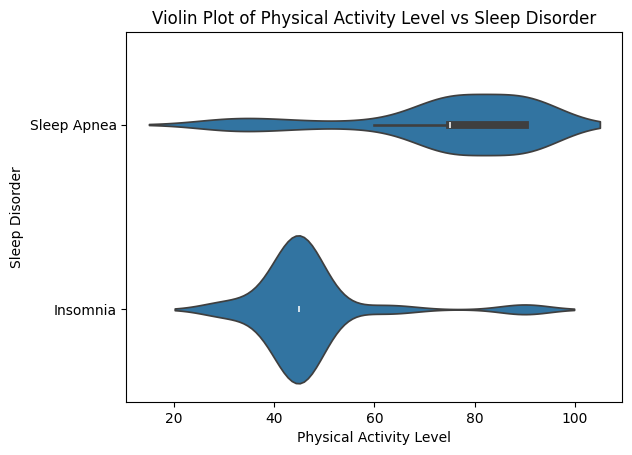

In [ ]:
# 小提琴圖
sns.violinplot(x='Physical Activity Level', y='Sleep Disorder', data=data)
plt.title('Violin Plot of Physical Activity Level vs Sleep Disorder')
plt.show()


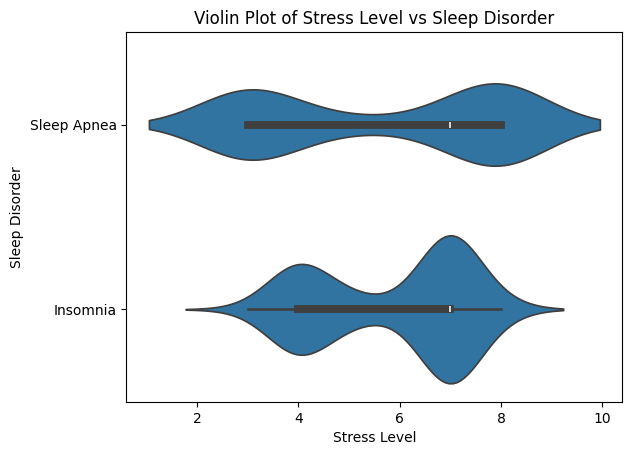

In [ ]:
sns.violinplot(x='Stress Level', y='Sleep Disorder', data=data)
plt.title('Violin Plot of Stress Level vs Sleep Disorder')
plt.show()


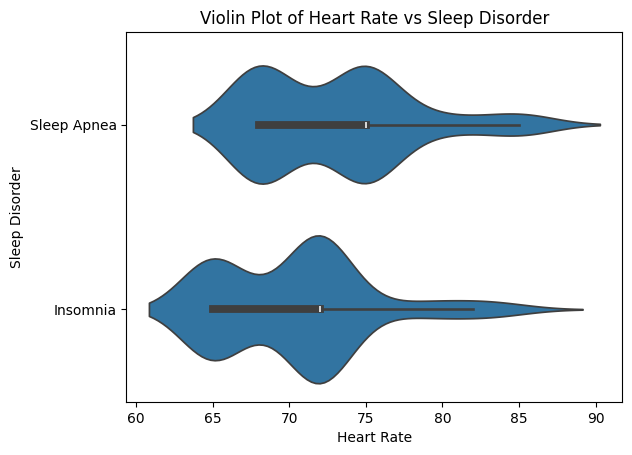

In [ ]:
sns.violinplot(x='Heart Rate', y='Sleep Disorder', data=data)
plt.title('Violin Plot of Heart Rate vs Sleep Disorder')
plt.show()


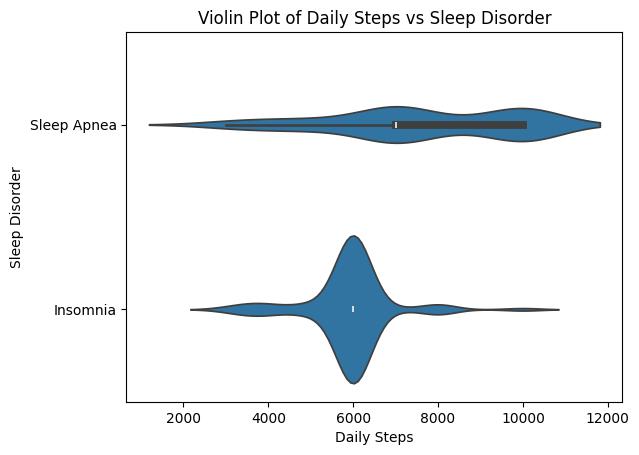

In [ ]:
sns.violinplot(x='Daily Steps', y='Sleep Disorder', data=data)
plt.title('Violin Plot of Daily Steps vs Sleep Disorder')
plt.show()
